# Welcome to Day 2
For later... https://bit.ly/2MEcpYM

# More Time Series Analysis

In [1]:
import pandas as pd

## Interpolation

In [46]:
rain = pd.read_csv("D:/Data/Rainfall/10010.csv", names=["Date", "Rain"], index_col="Date", parse_dates=["Date"])

In [47]:
weekly = rain.asfreq("W")

In [48]:
rain['weekly'] = weekly

In [8]:
rain.loc["2000"]

,Rain,weekly
Date,,
2000-01-01,179.514368,NaN
2000-02-01,130.529529,NaN
2000-03-01,235.893511,NaN
2000-04-01,298.959012,NaN
2000-05-01,282.654166,NaN
2000-06-01,204.684638,NaN
2000-07-01,161.817207,NaN
2000-08-01,133.597649,NaN
2000-09-01,112.913940,NaN


In [49]:
rain['filled'] = rain['weekly'].interpolate() # Easy to interpolate, but make sure the data is in order, and that the even is something relatively consistent

In [51]:
%matplotlib inline

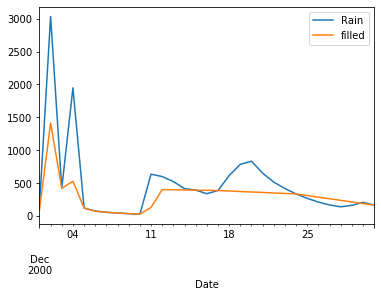

In [54]:
rain.loc["2000-12", ["Rain", "filled"]].plot(kind='line')

In [52]:
ts = pd.read_hdf("D:/Data/AAPL.h5")

In [55]:
ts.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2012-12-05', '2012-12-06', '2012-12-07', '2012-12-10',
               '2012-12-11', '2012-12-12', '2012-12-13', '2012-12-14',
               '2012-12-17', '2012-12-18'],
              dtype='datetime64[ns]', name='Date', length=3261, freq=None)

In [57]:
ts.describe() # executive summary, gives very general stats on the columns

,Open,High,Low,Close,Volume,Adj Close
count,3261.000000,3261.000000,3261.000000,3261.000000,3.261000e+03,3261.000000
mean,145.656900,147.435354,143.595624,145.569473,2.149814e+07,136.633554
std,160.485021,161.767461,158.765382,160.317263,1.485484e+07,163.856865
min,12.990000,13.190000,12.720000,13.120000,1.405000e+06,6.500000
25%,24.540000,25.040000,24.070000,24.670000,1.156680e+07,12.230000
50%,85.160000,86.380000,83.940000,85.210000,1.724560e+07,70.750000
75%,190.120000,192.000000,187.820000,189.950000,2.749240e+07,188.280000
max,702.410000,705.070000,699.570000,702.100000,2.650690e+08,698.910000


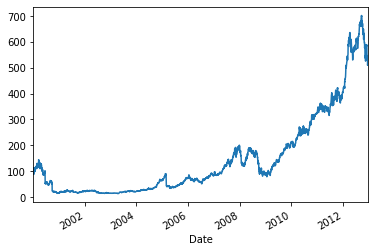

In [59]:
ts['Close'].plot()

In [60]:
ts.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,19144400,27.74
2000-01-04,108.25,110.62,101.19,102.50,18310000,25.40
2000-01-05,103.75,110.56,103.00,104.00,27818000,25.77
2000-01-06,106.12,107.00,95.00,95.00,27443200,23.54
2000-01-07,96.50,101.00,95.50,99.50,16463200,24.66


In [62]:
ts.resample("Y")['Volume'].sum() # total volume of each year since 2000

Date
2000-12-31     4298582600
2001-12-31     3380921000
2002-12-31     2750497400
2003-12-31     2543937600
2004-12-31     4350059600
2005-12-31     6514321000
2006-12-31     7703477400
2007-12-31     8820760200
2008-12-31    10213471500
2009-12-31     5116040000
2010-12-31     5393747400
2011-12-31     4430740100
2012-12-31     4588894400
Freq: A-DEC, Name: Volume, dtype: int64

In [68]:
ts['Difference'] = ts['Close'] - ts['Open']
ts.loc['2005':'2010']['Difference'].idxmax() # date with max difference between 2005 and 2010

Timestamp('2008-07-22 00:00:00')

In [98]:
ts.asfreq("A")['Adj Close'].diff().dropna()  # diff() is difference between current value and shifted value, where shift() keeps index in place, but moves data down one, pst_change() is change as percentage 

Date
2002-12-31     -3.75
2003-12-31      3.49
2004-12-31     21.33
2008-12-31   -111.74
2009-12-31    124.28
2010-12-31    110.84
Name: Adj Close, dtype: float64

# Interactive visualisation with Altair

matplotlib was for matlab users who wanted to move to python 

In [109]:
!pip install altair vega

In [110]:
!pip install --proxy=http://top-proxy01.core.mco.pr.top.sda.corp.telstra.com:3128 altair vega
    

In [123]:
populations = pd.read_csv("D:/Data/country_populations_by_year.csv", index_col="Country Name")
populations.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [124]:
countries_of_interest = ["Australia", "New Zealand", "Netherlands", "Greece"]
country_populations = populations.loc[countries_of_interest, '1960':'2017']

In [125]:
pop = country_populations.reset_index().melt(id_vars="Country Name")
pop.head()

,Country Name,variable,value
0,Australia,1960,10276477.0
1,New Zealand,1960,2371800.0
2,Netherlands,1960,11486631.0
3,Greece,1960,8331725.0
4,Australia,1961,10483000.0


In [126]:
pop.rename(columns={"variable": "Year", "value":"Population"}, inplace=True)

In [127]:
pop.head()

,Country Name,Year,Population
0,Australia,1960,10276477.0
1,New Zealand,1960,2371800.0
2,Netherlands,1960,11486631.0
3,Greece,1960,8331725.0
4,Australia,1961,10483000.0


In [128]:
import altair as alt

In [129]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [130]:
chart = alt.Chart(pop)

In [131]:
chart.mark_point() # refer to page 155

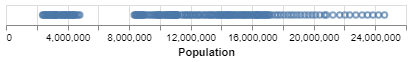

In [137]:
tick_chart = chart.mark_point()
tick_chart.encode(
    x="Population"
)

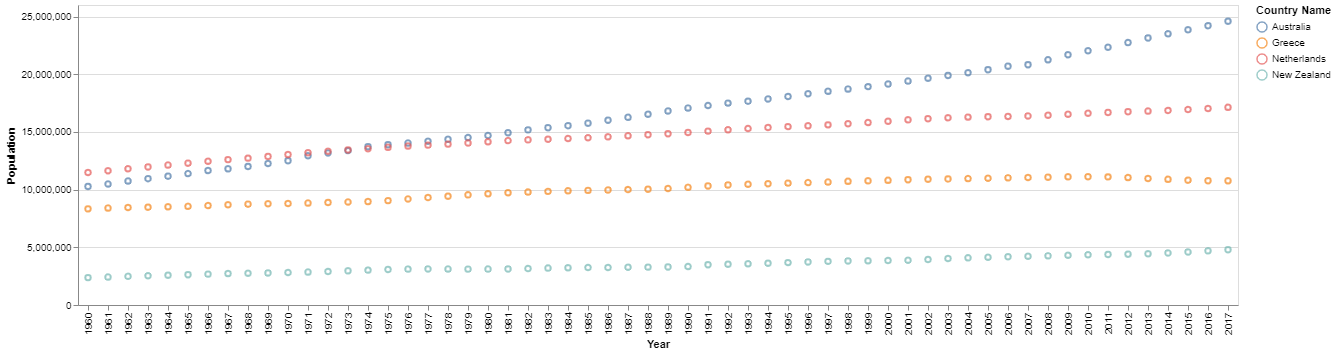

In [140]:
line_chart = chart.mark_point()
line_chart.encode(
    x="Year",
    y="Population",
    color="Country Name"
)

## Exercise: Plotting the MPG vs Acceleration for cars

In [141]:
cars = pd.read_csv("D:/Data/Auto.csv")

In [142]:
cars.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


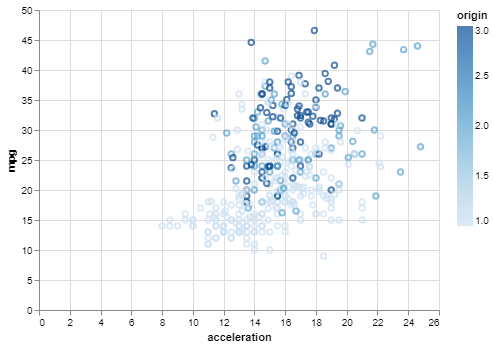

In [147]:
required_columns = ['name', 'mpg', 'acceleration', 'origin'] 
cars_filtered = cars.loc[:,required_columns]
cars_chart = alt.Chart(cars_filtered)
line_chart = cars_chart.mark_point()
line_chart.encode(
    x="acceleration",
    y="mpg",
    color="origin"
)